In [1]:
import sys
sys.path.append("../..")

import pandas
import math

from bokeh.io import export_png, export_svgs
from bokeh.models import ColumnDataSource, DataTable, TableColumn
from pandas import DataFrame

# Import dictonaries and Types
from app.components.basic_dataframes import dictMealState, dfMealCode, dfMealState
from app.components.simple_types import Nutrition, State
from app.components.extract_data.extract_data import *

# Use simple function
from app.components.search.papa_search import papaSingleSeach, SearchResult, fitness

from app.components.graphs.polar import plot_multiple_polar_charts

from app.components.extract_data.dataframes.dictionaries.nutrients import nutrients_signal

import random
import pickle
from IPython.display import clear_output

# Use simple function
from app.components.search.papa_search import papaSingleSeach, SearchResult

#Import graphic
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(dpi=300)

Loading basic data
Loading basic dictionary
Finish!


<Figure size 1920x1440 with 0 Axes>

<Figure size 1920x1440 with 0 Axes>

In [2]:
quantity = 10
fileName01 = "female25_100_0.pickle"
fileName02 = "male25_100_0.pickle"
fileName03 = "female60_100_0.pickle"
fileName04 = "male60_100_0.pickle"

In [9]:
personID = "UNKNOW"
personID = "110000016#7#1#5"
nutritionFactor = 100
nutritionFunction = Nutrition.absDifferenceNegativePenalty
distanceFactor=10
distanceFunction = State.squareDifference

Step 5: 
newPopulationOptions: [[3462.0598120369564, State()], [3443.8386003421497, State()], [3452.32086028822, State()], [3497.7891549541923, State()], [3452.32086028822, State()], [3359.4683024865926, State()], [3538.777648466347, State()], [3452.32086028822, State()], [3443.8386003421497, State()], [3497.7891549541923, State()], [3432.0024096104453, State()], [3464.6535492744965, State()], [3471.385560647724, State()], [3464.6535492744965, State()], [3471.385560647724, State()], [3497.901816349188, State()], [3327.46633857118, State()], [3497.901816349188, State()], [3508.049568149899, State()], [3537.276559346583, State()], [3462.0598120369564, State()], [3452.32086028822, State()], [3452.32086028822, State()], [3359.4683024865926, State()], [3497.7891549541923, State()], [3500.7042011823046, State()], [3455.8369767823447, State()], [3462.9033007016533, State()], [3500.7042011823046, State()], [3346.086037260345, State()], [3619.314519764353, State()], [3497.901816349188, State()]

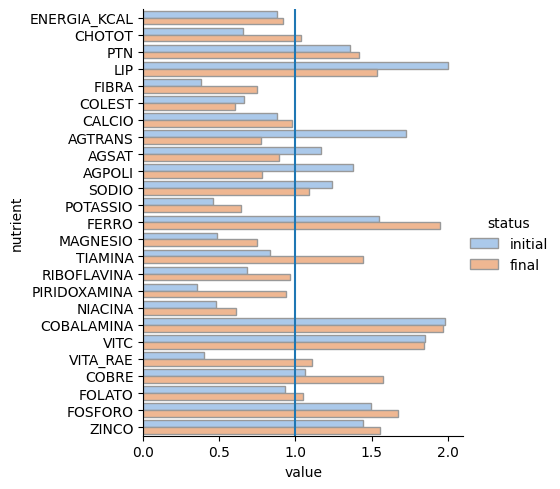

In [10]:

# fitness = Nutrition.absDifference
# fitness = Nutrition.distanceDifference
# result = papaSingleSeach(personID, max_population_set=10, max_population_selected=5, max_steps=1000)
# result = papaSingleSeach(personID, verbose=True, max_population_set=10,max_population_selected=5, unit=50, max_unit=5, max_steps=25)
# result = papaSingleSeach(personID, verbose=True, unit=100, max_unit=2, max_population_set=10, max_population_selected=10, expansion_set=10, expansion_select=3, max_steps=25, fitness=fitness)
# result = papaSingleSeach(personID, verbose=True, max_population_set=10,max_population_selected=8, expansion_set=5, unit=5, max_unit=10, max_steps=25, fitness=Nutrition.distanceDifference)
result = papaSingleSeach(
        personID, 
        verbose=True, 
        unit=50, 
        max_unit=3, 
        max_population_set=100, 
        max_population_selected=80, 
        expansion_set=10, 
        expansion_select=5, 
        max_steps=5, 
        crossover=0.2,
        nutritionFitness=nutritionFunction, 
        distanceFitness=distanceFunction,
        nutritionFactor=nutritionFactor,
        distanceFactor=distanceFactor,
        preserve_best=True,
        )

print(result)
targetNutrition = Nutrition.idealNutritionByPersonId(personID)
initialFitness = fitness(
                state=result.initialMeal,
                initialState=result.initialMeal,
                targetNutrition=targetNutrition,
                nutritionFitness=nutritionFunction,
                distanceFitness=distanceFunction,
                nutritionFactor=nutritionFactor,
                distanceFactor=distanceFactor,
        )

finalFitness = fitness(
                state=result.finalMeal,
                initialState=result.initialMeal,
                targetNutrition=targetNutrition,
                nutritionFitness=nutritionFunction,
                distanceFitness=distanceFunction,
                nutritionFactor=nutritionFactor,
                distanceFactor=distanceFactor,
        )


print("       PersonID: ", result.personIDs)
print("initialDistance: ", initialFitness)
print("  finalDistance: ", finalFitness)

result.show_comparison_graph("", title="")


In [4]:

dfPerson = getDfPerson()
male25 = dfPerson[ (dfPerson["AGE"]==25) & (dfPerson["GENDER"]=="male") ]["PESSOA"].to_list()
male60 = dfPerson[ (dfPerson["AGE"]==60) & (dfPerson["GENDER"]=="male") ]["PESSOA"].to_list()
female25 = dfPerson[ (dfPerson["AGE"]==25) & (dfPerson["GENDER"]=="female") ]["PESSOA"].to_list()
female60 = dfPerson[ (dfPerson["AGE"]==60) & (dfPerson["GENDER"]=="female") ]["PESSOA"].to_list()

In [5]:
# from app.components.graphs.polar import plot_multiple_polar_charts

# # Exemplo de entrada para 1, 2 e 4 gráficos
# num_points = 36
# female_energy_data = np.random.uniform(500, 1200, num_points)
# male_energy_data = np.random.uniform(2400, 6000, num_points)
# female_protein_data = np.random.uniform(40, 100, num_points)
# male_protein_data = np.random.uniform(50, 125, num_points)
# female_vitamin_data = np.random.uniform(100, 200, num_points)
# male_vitamin_data = np.random.uniform(150, 250, num_points)
# female_mineral_data = np.random.uniform(10, 50, num_points)
# male_mineral_data = np.random.uniform(20, 60, num_points)

# # Exemplos de uso com 1, 2 e 4 gráficos
# data_1_chart = [
#     {"variable_name": "Energy", "x_data": female_energy_data, "y_data": male_energy_data, 
#      "x_label": "1600 kcal - 2200 kcal", "y_label": "2400 kcal - 3000 kcal"}
# ]

# data_2_charts = [
#     {"variable_name": "Energy", "x_data": female_energy_data, "y_data": male_energy_data, 
#      "x_label": "1600 kcal - 2200 kcal", "y_label": "2400 kcal - 3000 kcal"},
#     {"variable_name": "Protein", "x_data": female_protein_data, "y_data": male_protein_data, 
#      "x_label": "40 gr - 100 gr", "y_label": "50 gr - 125 gr"}
# ]

# data_4_charts = [
#     {"variable_name": "Energy", "x_data": female_energy_data, "y_data": male_energy_data, 
#      "x_label": "1600 kcal - 2200 kcal", "y_label": "2400 kcal - 3000 kcal"},
#     {"variable_name": "Protein", "x_data": female_protein_data, "y_data": male_protein_data, 
#      "x_label": "40 gr - 100 gr", "y_label": "50 gr - 125 gr"},
#     {"variable_name": "Vitamin", "x_data": female_vitamin_data, "y_data": male_vitamin_data, 
#      "x_label": "100 mg - 200 mg", "y_label": "150 mg - 250 mg"},
#     {"variable_name": "Mineral", "x_data": female_mineral_data, "y_data": male_mineral_data, 
#      "x_label": "10 mg - 50 mg", "y_label": "20 mg - 60 mg"}
# ]

# # Gerando os gráficos
# print("Exemplo com 1 gráfico:")
# plot_multiple_polar_charts(data_1_chart, labels=list(range(36)))

# print("Exemplo com 2 gráficos:")
# plot_multiple_polar_charts(data_2_charts)

# print("Exemplo com 4 gráficos:")
# plot_multiple_polar_charts(data_4_charts)


In [10]:
def getResults(people:list, fileName:str, verbose:bool=False):
    try:
        with open("./output/" + fileName, "rb") as file:
            return pickle.load(file)
    except:
        results = []
        
        for i, person in enumerate(people):
            if verbose:
                clear_output(wait=True)
                print(f"Person {i}/{len(people)}")
                
            result = papaSingleSeach(
                person, 
                verbose=False, 
                unit=10, max_unit=2, 
                max_population_set=100, 
                max_population_selected=50, 
                expansion_set=50, 
                expansion_select=10, 
                max_steps=100, 
                nutritionFitness=Nutrition.absDifferenceNegativePenalty, 
                crossover=0.2, 
                nutritionFactor=1.0, 
                distanceFactor=0.0
            )
            
            results.append(result)
        
        with open("./output/" + fileName, "wb") as file:
            pickle.dump(results, file)  
        
        print(results)

In [11]:
#Male 25
male25 = dfPerson[ (dfPerson["AGE"]==25) & (dfPerson["GENDER"]=="male") ]["PESSOA"].to_list()
random.shuffle( male25 )
people01 = male25[:quantity]

In [12]:
#Female 25
female25 = dfPerson[ (dfPerson["AGE"]==25) & (dfPerson["GENDER"]=="female") ]["PESSOA"].to_list()
random.shuffle( female25 )
people02 = female25[:quantity]

In [13]:
#Male 60
male60 = dfPerson[ (dfPerson["AGE"]==60) & (dfPerson["GENDER"]=="male") ]["PESSOA"].to_list()
random.shuffle( male60 )
people03 = male60[:quantity]

In [14]:
#Female 60
female60 = dfPerson[ (dfPerson["AGE"]==60) & (dfPerson["GENDER"]=="female") ]["PESSOA"].to_list()
random.shuffle( female60 )
people04 = female60[:quantity]

In [15]:
getResults(people01, fileName01, verbose=True)
getResults(people02, fileName02, verbose=True)
getResults(people03, fileName03, verbose=True)
getResults(people04, fileName04, verbose=True)

Person 3/10
State: {8000101: 0.0, 7901602: 0.0, 8501303: 0.0, 6906602: 65.0, 6300101: 0.0, 7112802: 0.0, 6303102: 0.0, 6601805: 0.0, 8201004: 0.0, 8570328: 120.0, 7108902: 0.0, 8510601: 90.0, 8200101: 0.0, 8500903: 0.0, 7004301: 0.0, 7004802: 0.0, 8002201: 0.0, 8400101: 0.0, 8004801: 0.0, 8500401: 600.0, 6501516: 0.0, 6300113: 0.0, 7800302: 0.0, 8500605: 0.0, 6902910: 0.0, 6803001: 0.0, 6901701: 0.0, 8201005: 0.0, 8002254: 0.0, 6900702: 0.0, 8503801: 0.0, 8300101: 0.0, 8501302: 50.0, 7109101: 0.0, 8511401: 0.0, 8280001: 0.0, 7800401: 720.0, 6701704: 0.0, 6801101: 0.0, 6300201: 0.0, 7803301: 0.0, 6400802: 0.0, 6802601: 0.0, 8216301: 3000.0, 7104102: 0.0, 8502204: 0.0, 8502202: 0.0, 8579146: 0.0, 6501415: 0.0, 8500416: 0.0, 8003801: 0.0, 6901002: 0.0, 8002225: 0.0, 7104301: 0.0, 8570329: 0.0, 6503401: 0.0, 8102205: 0.0, 8500202: 0.0, 8102101: 0.0, 8002246: 0.0, 8200301: 0.0, 6501401: 0.0, 8500402: 0.0, 6803401: 0.0, 8003601: 0.0, 8504501: 0.0, 8502301: 0.0, 8500407: 0.0, 7903110: 0.0, 79

KeyboardInterrupt: 

In [ ]:
def get_result_by(resultList:list[SearchResult], nutrient:str, type:str="nutrition"):
    if type=="nutrition":
        data_input = {
            "variable_name": nutrient, 
            "x_data": [], 
            "y_data": [], 
            "x_label": '1600 kcal - 2200 kcal', 
            'y_label': '2400 kcal - 3000 kcal'}
        
        
        data_input["x_data"] = np.array([ min(1.0, result.initialNutrition.data[nutrient]/Nutrition.idealNutritionByPersonId(result.personIDs[0])[nutrient]) for result in resultList])
        data_input["y_data"] = np.array([ min(1.0, result.finalNutrition.data[nutrient]/Nutrition.idealNutritionByPersonId(result.personIDs[0])[nutrient]) for result in resultList])       
            
        return data_input
    else:
        data_input = {
            "variable_name": nutrient, # Group 
            "x_data": [], 
            "y_data": [], 
            "x_label": 'Initial', 
            'y_label': 'Final'}

        data_input["x_data"] = np.array([ min(1.0, result.initialNutrition.data[nutrient]/Nutrition.idealNutritionByPersonId(result.personIDs[0])[nutrient]) for result in resultList])
        data_input["y_data"] = np.array([ min(1.0, result.finalNutrition.data[nutrient]/Nutrition.idealNutritionByPersonId(result.personIDs[0])[nutrient]) for result in resultList])       
            
        return data_input

[0.37069592 0.53885779 0.04152799 0.33453858 1.         1.
 0.26739788 0.14415734 0.77816944 0.25577723]
[1.         0.18335855 0.12792738 1.         0.4419062  0.33304841
 1.         0.14164902 0.21698185 1.        ]
[0.47301664 1.         0.3205416  1.         0.01691377 0.15300303
 1.         1.         1.         1.        ]
[1.         0.16493192 0.84981846 1.         1.         1.
 0.01282905 0.02913767 0.09836006 0.71338124]


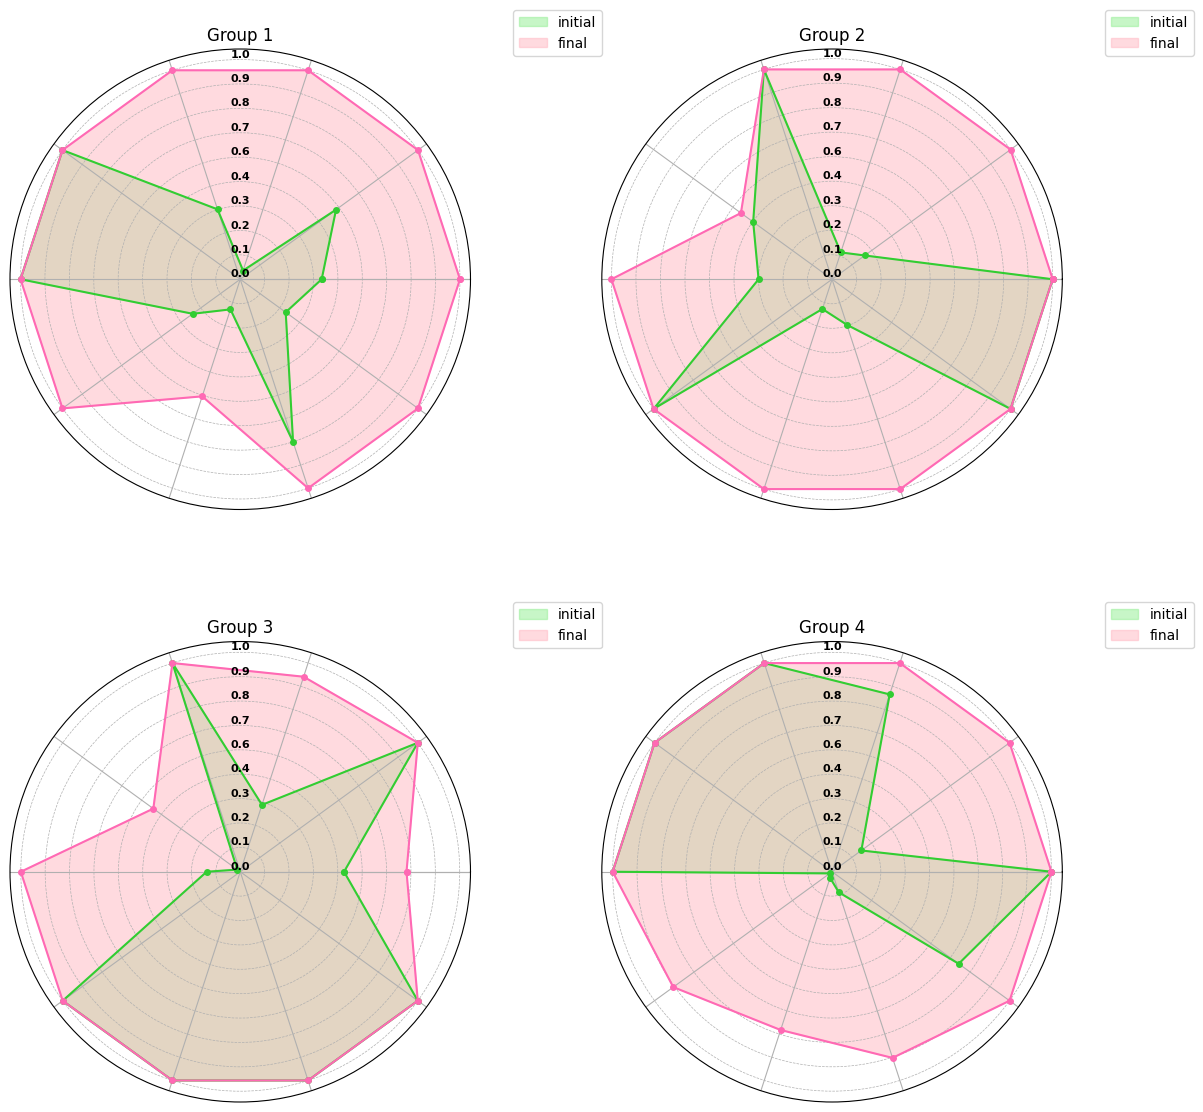

In [ ]:
num_points = 36
female_energy_data = np.random.uniform(500, 1200, num_points)
male_energy_data = np.random.uniform(2400, 6000, num_points)

data_1_chart = [
    {"variable_name": "Energy", "x_data": female_energy_data, "y_data": male_energy_data, 
     "x_label": "1600 kcal - 2200 kcal", "y_label": "2400 kcal - 3000 kcal"}
]


labels = [ "" for x in range(quantity)]

female25Results = getResults(female25[:quantity], fileName01, verbose=True) 
female25VITC = get_result_by(female25Results, "VITC")
female25VITC["variable_name"] = "Group 1"
female25VITC["x_label"] = "initial"
female25VITC["y_label"] = "final" 

male25Results = getResults(male25[:quantity], fileName02, verbose=True) 
male25VITC = get_result_by(male25Results, "VITC")
male25VITC["variable_name"] = "Group 2"
male25VITC["x_label"] = "initial"
male25VITC["y_label"] = "final" 

female60Results = getResults(female60[:quantity], fileName03, verbose=True) 
female60VITC = get_result_by(female60Results, "VITC")
female60VITC["variable_name"] = "Group 3"
female60VITC["x_label"] = "initial"
female60VITC["y_label"] = "final" 

male60Results = getResults(male60[:quantity], fileName04, verbose=True) 
male60VITC = get_result_by(male60Results, "VITC")
male60VITC["variable_name"] = "Group 4"
male60VITC["x_label"] = "initial"
male60VITC["y_label"] = "final" 


plot_multiple_polar_charts([female25VITC, male25VITC, female60VITC, male60VITC], num_points=quantity, labels=labels)
# plot_multiple_polar_charts(data_1_chart, num_points=36)

[0.71718182 1.         0.07       0.11363636 0.89302273 0.81
 0.53545455 0.11709091 0.92727273 1.        ]
[0.14318182 0.53727273 0.20363636 0.40695455 0.58481818 0.57909091
 0.12390909 0.59681818 0.49818182 0.50745455]
[1.         0.95709091 0.834      1.         0.04272727 1.
 0.85545455 0.09409091 0.67727273 0.21054545]
[0.28927273 0.56736364 0.06136364 0.585      0.37345455 0.35218182
 0.24645455 0.05545455 0.17836364 0.63136364]


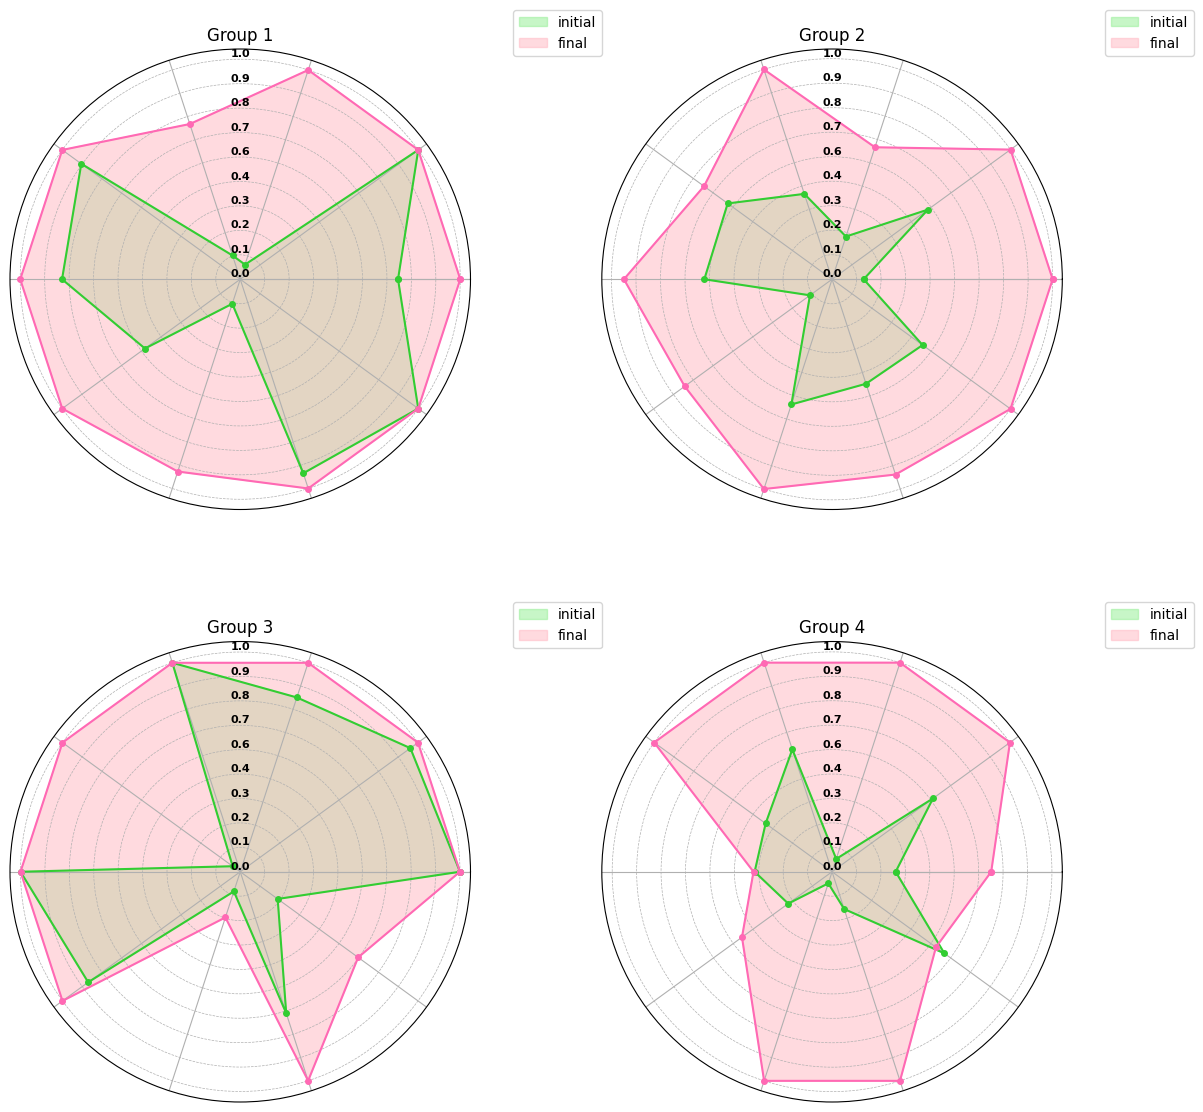

In [ ]:
labels = [ "" for x in range(quantity)]
nutrient = "PIRIDOXAMINA"

female25Results = getResults(female25[:quantity], fileName01, verbose=True) 
female25B6 = get_result_by(female25Results, nutrient)
female25B6["variable_name"] = "Group 1"
female25B6["x_label"] = "initial"
female25B6["y_label"] = "final" 

male25Results = getResults(male25[:quantity], fileName02, verbose=True) 
male25B6 = get_result_by(male25Results, nutrient)
male25B6["variable_name"] = "Group 2"
male25B6["x_label"] = "initial"
male25B6["y_label"] = "final" 

female60Results = getResults(female60[:quantity], fileName03, verbose=True) 
female60B6 = get_result_by(female60Results, nutrient)
female60B6["variable_name"] = "Group 3"
female60B6["x_label"] = "initial"
female60B6["y_label"] = "final" 

male60Results = getResults(male60[:quantity], fileName04, verbose=True) 
male60B6 = get_result_by(male60Results, nutrient)
male60B6["variable_name"] = "Group 4"
male60B6["x_label"] = "initial"
male60B6["y_label"] = "final" 


plot_multiple_polar_charts([female25B6, male25B6, female60B6, male60B6], num_points=quantity, labels=labels)
# plot_multiple_polar_charts(data_1_chart, num_points=36)

In [ ]:
def get_result_by_greater_than(resultList:list[SearchResult], nutrients:list[str]):
    data_input = {
        "variable_name": "GREATER", 
        "x_data": [], 
        "y_data": [], 
        "x_label": '1600 kcal - 2200 kcal', 
        'y_label': '2400 kcal - 3000 kcal'}
    
    data_input["x_data"] = np.array( [0.0 for x in range(quantity)])
    data_input["y_data"] = np.array( [0.0 for x in range(quantity)])

    for nutrient in nutrients:
        for i, result in enumerate(resultList):
            data_input["x_data"][i] += min(1.0, result.initialNutrition.data[nutrient]/Nutrition.idealNutritionByPersonId(result.personIDs[0])[nutrient])/len(nutrients)
            data_input["y_data"][i] += min(1.0, result.finalNutrition.data[nutrient]/Nutrition.idealNutritionByPersonId(result.personIDs[0])[nutrient])/len(nutrients)
     
        
    return data_input

In [ ]:
def get_result_by_less_than(resultList:list[SearchResult], nutrients:list[str]):
    data_input = {
        "variable_name": "LESS", 
        "x_data": [], 
        "y_data": [], 
        "x_label": '1600 kcal - 2200 kcal', 
        'y_label': '2400 kcal - 3000 kcal'}
    
    data_input["x_data"] = np.array( [0.0 for x in range(quantity)])
    data_input["y_data"] = np.array( [0.0 for x in range(quantity)])

    for nutrient in nutrients:
        for i, result in enumerate(resultList):
            data_input["x_data"][i] += (1.0 if result.initialNutrition.data[nutrient]<=Nutrition.idealNutritionByPersonId(result.personIDs[0])[nutrient] else 0 )/len(nutrients)
            data_input["y_data"][i] += (1.0 if result.finalNutrition.data[nutrient]<=Nutrition.idealNutritionByPersonId(result.personIDs[0])[nutrient] else 0 )/len(nutrients)
     
        
    return data_input

In [ ]:
greaters = [ nutrient for nutrient, signal in nutrients_signal.items() if signal==">"]
less = [ nutrient for nutrient, signal in nutrients_signal.items() if signal=="<"]

greaters

['CHOTOT',
 'PTN',
 'FIBRA',
 'CALCIO',
 'POTASSIO',
 'FERRO',
 'MAGNESIO',
 'TIAMINA',
 'RIBOFLAVINA',
 'PIRIDOXAMINA',
 'NIACINA',
 'COBALAMINA',
 'VITC',
 'VITA_RAE',
 'COBRE',
 'FOLATO',
 'FOSFORO',
 'ZINCO']

male25T 10 10
female25T 10 10
male60T 10 10
female60T 10 10
[0.70618084 0.96456706 0.68649619 0.68982979 0.91254925 0.93608068
 0.81040829 0.56423877 0.88851097 0.72050169]
[0.56010796 0.68689787 0.40056223 0.96705303 0.8243318  0.79622855
 0.65147159 0.74074646 0.77917955 0.73331776]
[0.70751235 0.98037227 0.74783138 0.98000934 0.51123045 0.6737662
 0.72703632 0.799828   0.93371584 0.75729551]
[0.61169491 0.66747271 0.50309755 0.85670712 0.61592788 0.89560507
 0.54536802 0.58945627 0.4514406  0.9030699 ]


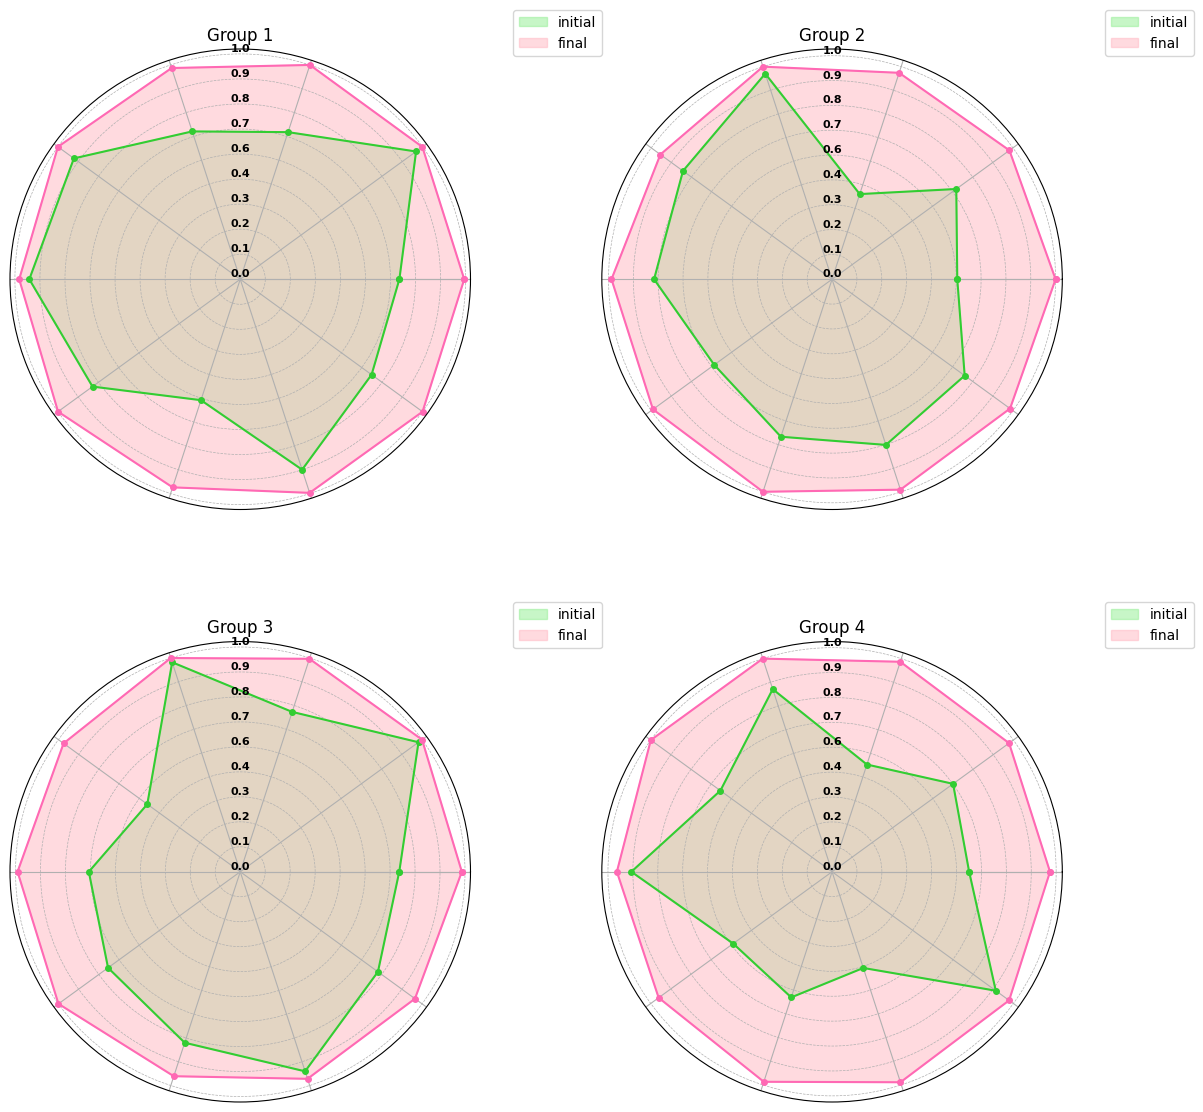

Group 1: 0.7805040348909081 0.9928290259558288 0.21232499106492064
Group 2: 0.7000004328568048 0.9864790179187692 0.28647858506196444
Group 3: 0.7751009107963795 0.9833285329276222 0.20822762213124268
Group 4: 0.6592304487762445 0.9793344786343563 0.3201040298581118


In [ ]:
labels = [ "" for x in range(quantity)]
nutrients = greaters

female25Results = getResults(female25[:quantity], fileName01, verbose=True) 
female25T = get_result_by_greater_than(female25Results, nutrients)
female25T["variable_name"] = "Group 1"
female25T["x_label"] = "initial"
female25T["y_label"] = "final" 

male25Results = getResults(male25[:quantity], fileName02, verbose=True) 
male25T = get_result_by_greater_than(male25Results, nutrients)
male25T["variable_name"] = "Group 2"
male25T["x_label"] = "initial"
male25T["y_label"] = "final" 

female60Results = getResults(female60[:quantity], fileName03, verbose=True) 
female60T = get_result_by_greater_than(female60Results, nutrients)
female60T["variable_name"] = "Group 3"
female60T["x_label"] = "initial"
female60T["y_label"] = "final" 

male60Results = getResults(male60[:quantity], fileName04, verbose=True) 
male60T = get_result_by_greater_than(male60Results, nutrients)
male60T["variable_name"] = "Group 4"
male60T["x_label"] = "initial"
male60T["y_label"] = "final" 

print("male25T", len(male25T["x_data"]), len(male25T["y_data"]))
print("female25T", len(female25T["x_data"]), len(female25T["y_data"]))
print("male60T", len(male60T["x_data"]), len(male60T["y_data"]))
print("female60T", len(female60T["x_data"]), len(female60T["y_data"]))

plot_multiple_polar_charts([female25T, male25T, female60T, male60T], num_points=quantity, labels=labels)
# plot_multiple_polar_charts(data_1_chart, num_points=36)
print("Group 1:", np.mean(female25T["x_data"]), np.mean(female25T["y_data"]), np.mean(female25T["y_data"])-np.mean(female25T["x_data"]))
print("Group 2:", np.mean(male25T["x_data"]), np.mean(male25T["y_data"]), np.mean(male25T["y_data"])-np.mean(male25T["x_data"]))
print("Group 3:", np.mean(female60T["x_data"]), np.mean(female60T["y_data"]), np.mean(female60T["y_data"])-np.mean(female60T["x_data"]))
print("Group 4:", np.mean(male60T["x_data"]), np.mean(male60T["y_data"]), np.mean(male60T["y_data"])-np.mean(male60T["x_data"]))

In [ ]:
print(len(greaters))

18


[0.71428571 0.14285714 0.85714286 0.71428571 0.85714286 0.
 0.42857143 1.         0.42857143 0.85714286]
[1.         0.85714286 1.         0.28571429 0.57142857 0.42857143
 0.85714286 0.57142857 0.57142857 0.71428571]
[1.         0.71428571 0.85714286 0.57142857 0.85714286 0.71428571
 0.71428571 0.71428571 0.57142857 0.71428571]
[0.85714286 0.85714286 0.85714286 1.         0.71428571 0.14285714
 1.         1.         1.         0.14285714]


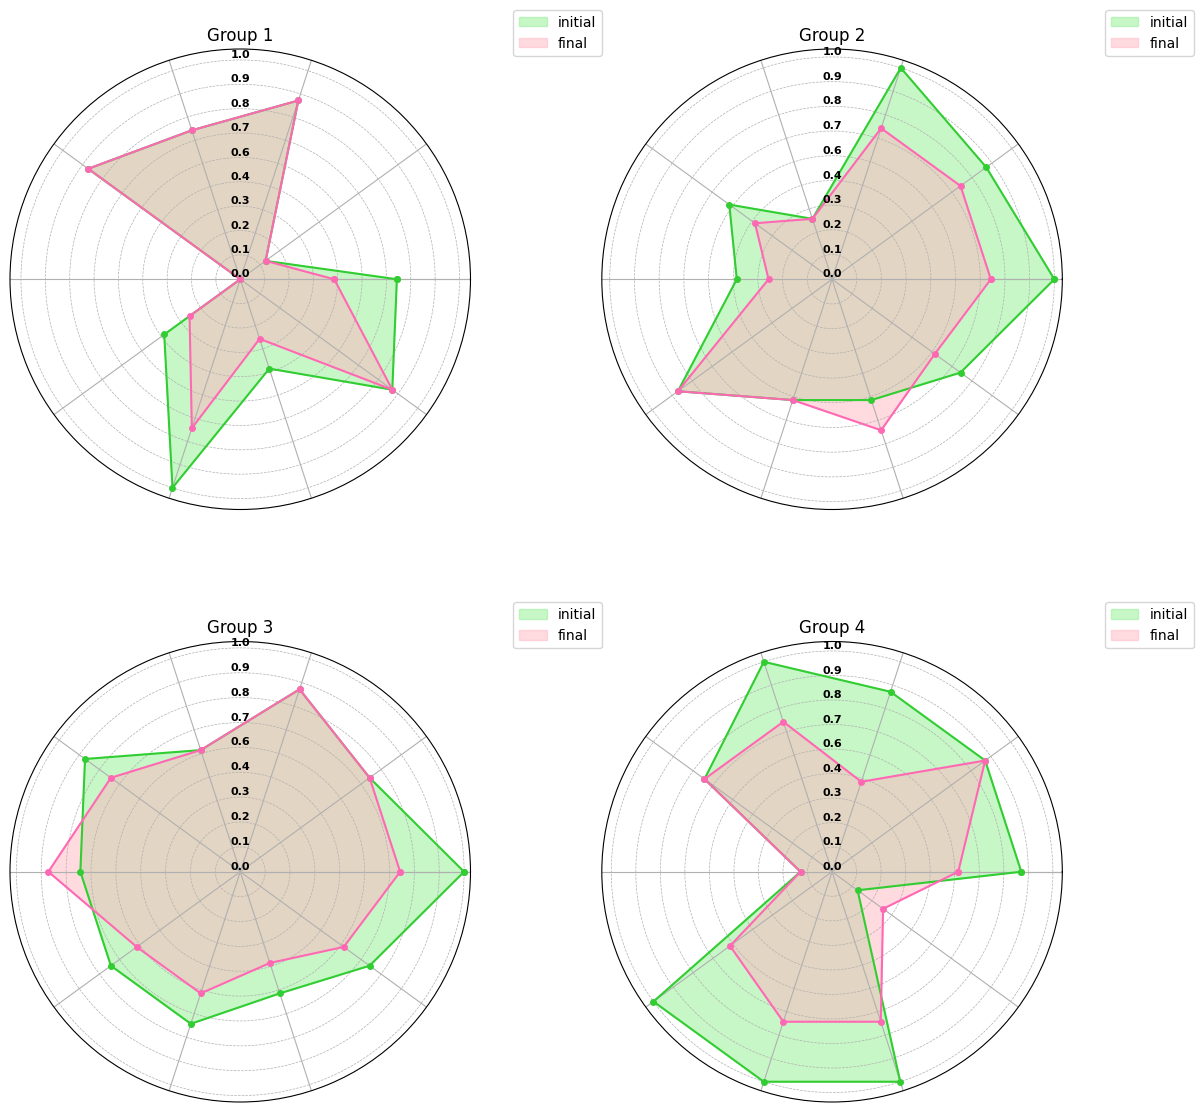

Group 1: 0.6103896103896104 0.5064935064935064
Group 2: 0.7142857142857143 0.5974025974025974
Group 3: 0.766233766233766 0.6623376623376623
Group 4: 0.766233766233766 0.5714285714285713


In [ ]:
labels = [ "" for x in range(quantity)]
nutrients = less

female25Results = getResults(female25[:quantity], fileName01, verbose=True) 
female25T = get_result_by_less_than(female25Results, nutrients)
female25T["variable_name"] = "Group 1"
female25T["x_label"] = "initial"
female25T["y_label"] = "final" 

male25Results = getResults(male25[:quantity], fileName02, verbose=True) 
male25T = get_result_by_less_than(male25Results, nutrients)
male25T["variable_name"] = "Group 2"
male25T["x_label"] = "initial"
male25T["y_label"] = "final" 

female60Results = getResults(female60[:quantity], fileName03, verbose=True) 
female60T = get_result_by_less_than(female60Results, nutrients)
female60T["variable_name"] = "Group 3"
female60T["x_label"] = "initial"
female60T["y_label"] = "final" 

male60Results = getResults(male60[:quantity], fileName04, verbose=True) 
male60T = get_result_by_less_than(male60Results, nutrients)
male60T["variable_name"] = "Group 4"
male60T["x_label"] = "initial"
male60T["y_label"] = "final" 

# print(len(male60T["x_data"]))
# print(len(male60T["y_data"]))
plot_multiple_polar_charts([female25T, male25T, female60T, male60T], num_points=quantity, labels=labels)
# plot_multiple_polar_charts(data_1_chart, num_points=36)
print("Group 1:", np.mean(female25T["x_data"]), np.mean(female25T["y_data"]))
print("Group 2:", np.mean(male25T["x_data"]), np.mean(male25T["y_data"]))
print("Group 3:", np.mean(female60T["x_data"]), np.mean(female60T["y_data"]))
print("Group 4:", np.mean(male60T["x_data"]), np.mean(male60T["y_data"]))

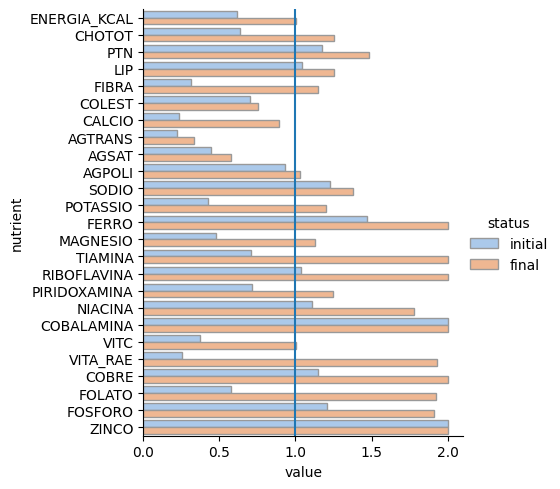

In [ ]:
female25Results[0].show_comparison_graph()

In [6]:
from app.components.scripts.get_tbca import TBCA

dictTBCAName = TBCA.getDictTBCA()
dictV9001ToTBCA = getDictV9001ToTbca()

In [12]:
# 6303102 - Init: 17.0  / Final: 67.0
# 7004301 - Init: 40.0  / Final: 0.0
# 8400101 - Init: 16.0  / Final: 0.0
# 8004801 - Init: 65.0  / Final: 15.0
# 6501415 - Init: 0.0  / Final: 50.0
# 6501401 - Init: 0.0  / Final: 50.0
# 6900821 - Init: 0.0  / Final: 50.0
print(dictTBCAName[dictV9001ToTBCA["7004301"]])
print(dictTBCAName[dictV9001ToTBCA["8400101"]])
print(dictTBCAName[dictV9001ToTBCA["8004801"]])
print(dictTBCAName[dictV9001ToTBCA["6900821"]])
# print(dictTBCAName[dictV9001ToTBCA["6501401"]])
# print(dictTBCAName[dictV9001ToTBCA["6900821"]])
# print(dictTBCAName[dictV9001ToTBCA["8500224"]])
# print(dictTBCAName[dictV9001ToTBCA["7901201"]])

# 6501401 - Init: 40.0  / Final: 140.0
# 8502301 - Init: 0.0  / Final: 50.0
# 8216601 - Init: 0.0  / Final: 50.0
# 6500903 - Init: 0.0  / Final: 75.0
# 7900710 - Init: 0.0  / Final: 100.0

tbca code: C0031D
portuguese: Maionese, molho, tradicional  
english: Mayonnaise, with eggs, industrialized
nutrients: {'ENERGIA_KCAL': 3.06, 'CHOTOT': 0.079, 'PTN': 0.0058, 'LIP': 0.305, 'FIBRA': 0.0, 'COLEST': 0.425, 'AGSAT': 0.040999999999999995, 'AGPOLI': 0.154, 'AGTRANS': 0.0017000000000000001, 'CALCIO': 0.0348, 'FERRO': 0.001, 'SODIO': 7.86, 'MAGNESIO': 0.0086, 'FOSFORO': 0.145, 'POTASSIO': 0.161, 'ZINCO': 0.0006, 'COBRE': 0.0, 'VITA_RAE': 0.0827, 'TIAMINA': 0.0, 'RIBOFLAVINA': 0.0005, 'NIACINA': 0.0, 'PIRIDOXAMINA': 0.0, 'COBALAMINA': 0.0005, 'VITC': 0.0, 'FOLATO': 0.0208}
tbca code: C0002D
portuguese: Azeite, olivaOlea europaeaL. 
english: Oil, olives
nutrients: {'ENERGIA_KCAL': 9.0, 'CHOTOT': 0.0, 'PTN': 0.0, 'LIP': 1.0, 'FIBRA': 0.0, 'COLEST': 0.0, 'AGSAT': 0.149, 'AGPOLI': 0.095, 'AGTRANS': 0.0, 'CALCIO': 0.0, 'FERRO': 0.0001, 'SODIO': 0.0, 'MAGNESIO': 0.0, 'FOSFORO': 0.0, 'POTASSIO': 0.0, 'ZINCO': 0.0, 'COBRE': 0.0, 'VITA_RAE': 0.0, 'TIAMINA': 0.0, 'RIBOFLAVINA': 0.0, 'NIAC

In [ ]:

def get_food_groups(self, initial=True) -> dict[str, float]:
    groupNames = getDictV9001ToGroupEnNames()
    sumDict = { value: 0.0 for value in groupNames.values()}

    v9001ToGroup = getDictV9001toGroupEn()

    for v9001, quantity in result.initialMeal.data.items():
        sumDict[ v9001ToGroup[v9001] ] += quantity

    return sumDict

foodSum = get_food_groups(1,True)
print(foodSum)

{'Meat products': 90.0, 'Seeds and nuts': 0.0, 'Legume products': 17.0, 'Vegetable products': 80.0, 'Beverages': 740.0, 'Milk and dairy products': 0.0, 'Foods for special purposes': 0.0, 'Cereal products': 310.0, 'Sugary products': 5.0, 'Miscellaneous': 20.0, 'Fish and seafood': 0.0, 'Eggs and egg products': 0.0, 'Fruits and fruit products': 150.0, 'Fats and oils': 56.0}


In [ ]:
print(female25Results[7].get_food_groups(initial=True))
print(female25Results[7].get_food_groups(initial=False))

{'Meat products': 180.0, 'Seeds and nuts': 0.0, 'Legume products': 0.0, 'Vegetable products': 146.5, 'Beverages': 2150.0, 'Milk and dairy products': 0.0, 'Foods for special purposes': 0.0, 'Cereal products': 140.0, 'Sugary products': 5.0, 'Miscellaneous': 0.0, 'Fish and seafood': 0.0, 'Eggs and egg products': 0.0, 'Fruits and fruit products': 300.0, 'Fats and oils': 0.0}
{'Meat products': 110.0, 'Seeds and nuts': 0.0, 'Legume products': 0.0, 'Vegetable products': 516.5, 'Beverages': 2420.0, 'Milk and dairy products': 30.0, 'Foods for special purposes': 0.0, 'Cereal products': 380.0, 'Sugary products': 5.0, 'Miscellaneous': 0.0, 'Fish and seafood': 0.0, 'Eggs and egg products': 0.0, 'Fruits and fruit products': 740.0, 'Fats and oils': 0.0}


In [ ]:
nutrients = list(set(getDictV9001ToGroupEnNames().values()))
nutrients = {groupName:id for id,groupName in enumerate(nutrients) }	
len(nutrients)

14

In [ ]:
def get_result_by_groups(resultList:list[SearchResult]):
    nutrients = getListGroupsEn()
    nutrients = {groupName:id for id,groupName in enumerate(nutrients) }	
    
    data_input = {
        "variable_name": "GREATER", 
        "x_data": [], 
        "y_data": [], 
        "x_label": '1600 kcal - 2200 kcal', 
        'y_label': '2400 kcal - 3000 kcal'}
    
    data_input["x_data"] = np.array( [0.0 for x in range(len(nutrients))])
    data_input["y_data"] = np.array( [0.0 for x in range(len(nutrients))])
    
    resultsInitial = [ result.get_food_groups() for result in resultList ]
    resultsFinal = [ result.get_food_groups(initial=False) for result in resultList ]
    

    for nutrient, id in nutrients.items():
        for result in resultsInitial:
            data_input["x_data"][id] += (result[nutrient])/len(resultList)
            
        for result in resultsFinal:
            data_input["y_data"][id] += (result[nutrient])/len(resultList)
     
        
    return data_input

In [ ]:
female25G = get_result_by_groups(female25Results)
female60G = get_result_by_groups(female60Results)
male25G = get_result_by_groups(male25Results)
male60G = get_result_by_groups(male60Results)

[2.55400e+02 2.10000e+01 2.97500e+02 1.25000e+00 1.62000e+02 1.45000e+03
 5.26000e+01 1.50000e+01 1.00000e+01 0.00000e+00 8.60000e+00 1.35575e+02
 0.00000e+00 5.49700e+02]


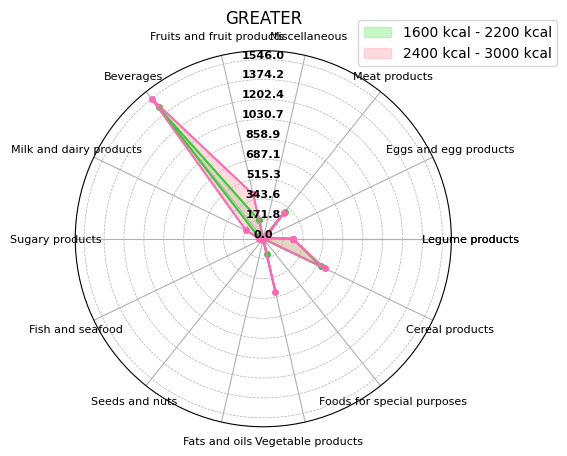

Group 1: 0.6103896103896104 0.5064935064935064


In [ ]:
plot_multiple_polar_charts([female25G], num_points=14, labels=getListGroupsEn())
# plot_multiple_polar_charts(data_1_chart, num_points=36)
print("Group 1:", np.mean(female25T["x_data"]), np.mean(female25T["y_data"]))

In [ ]:
nutrients = getListGroupsEn()
nutrients

['Legume products',
 'Eggs and egg products',
 'Meat products',
 'Miscellaneous',
 'Fruits and fruit products',
 'Beverages',
 'Milk and dairy products',
 'Sugary products',
 'Fish and seafood',
 'Seeds and nuts',
 'Fats and oils',
 'Vegetable products',
 'Foods for special purposes',
 'Cereal products']

In [ ]:
female25G

{'variable_name': 'GREATER',
 'x_data': array([2.55400e+02, 2.10000e+01, 2.97500e+02, 1.25000e+00, 1.62000e+02,
        1.45000e+03, 5.26000e+01, 1.50000e+01, 1.00000e+01, 0.00000e+00,
        8.60000e+00, 1.35575e+02, 0.00000e+00, 5.49700e+02, 2.55400e+02]),
 'y_data': array([2.55400e+02, 2.10000e+01, 2.86500e+02, 1.25000e+00, 3.92000e+02,
        1.54600e+03, 1.65600e+02, 3.60000e+01, 1.00000e+01, 0.00000e+00,
        8.60000e+00, 4.70575e+02, 0.00000e+00, 5.86700e+02, 2.55400e+02]),
 'x_label': '1600 kcal - 2200 kcal',
 'y_label': '2400 kcal - 3000 kcal'}

In [ ]:
def showGroupBarGraph(dictData:dict, ignoredGroups:list[str]=None):
    """show Group Bar Graph
        ignoredGroups is a list of not showing groups
    Args:
        dictData (dict):
        "variable_name": "Variable name", 
        "x_data": [2,4,6,3], 
        "y_data": [2,4,6,3], 
        "x_label": 'X description', 
        'y_label': 'Y description'}
    """
    nutrient = []
    status = []
    value = []
    nutrients = getListGroupsEn()
    
    if(ignoredGroups==None):
        ignoredGroups = [
            "Sugary products",
            "Foods for special purposes"
        ]

    for state, nutrition in [
        ("initial", dictData["x_data"]),
        ("final", dictData["y_data"]),
    ]:

        for id, temp in enumerate(nutrients):
            if(temp in ignoredGroups):
                continue
            
            nutrient.append(temp)
            status.append(state)
            value.append(nutrition[id]/(dictData["x_data"][id] if dictData["x_data"][id] > 0.0 else 1.0))

    data = {}
    data["nutrient"] = nutrient
    data["status"] = status
    data["value"] = value
    
    print(data)

    df = DataFrame(
        data=data,
    )
    print(df)
    g = sns.catplot(
        data=df,
        x="value",
        y="nutrient",
        hue="status",
        kind="bar",
        palette="pastel",
        edgecolor=".6",
        height=6,
        aspect=1.5
    )
    for ax in g.axes.flat:
        for p in ax.patches:
            # Obter a altura da barra (valor)
            width = p.get_width()
            if(width==0.0):
                continue
            ax.text(width+0.1, p.get_y() + p.get_height() / 2, f'{width:.2f}', 
                ha='left', va='center', fontsize=10)
            
    g.set_xlabels("percentage")
    g.set_ylabels("group")

    plt.axvline(x=1)

    plt.show()

{'nutrient': ['Legume products', 'Eggs and egg products', 'Meat products', 'Miscellaneous', 'Fruits and fruit products', 'Beverages', 'Milk and dairy products', 'Fish and seafood', 'Seeds and nuts', 'Fats and oils', 'Vegetable products', 'Cereal products', 'Legume products', 'Eggs and egg products', 'Meat products', 'Miscellaneous', 'Fruits and fruit products', 'Beverages', 'Milk and dairy products', 'Fish and seafood', 'Seeds and nuts', 'Fats and oils', 'Vegetable products', 'Cereal products'], 'status': ['initial', 'initial', 'initial', 'initial', 'initial', 'initial', 'initial', 'initial', 'initial', 'initial', 'initial', 'initial', 'final', 'final', 'final', 'final', 'final', 'final', 'final', 'final', 'final', 'final', 'final', 'final'], 'value': [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.9630252100840336, 1.0, 2.419753086419753, 1.0662068965517242, 3.1482889733840302, 1.0, 0.0, 1.0, 3.4709570348515584, 1.067309441513553]}
                     nutrien

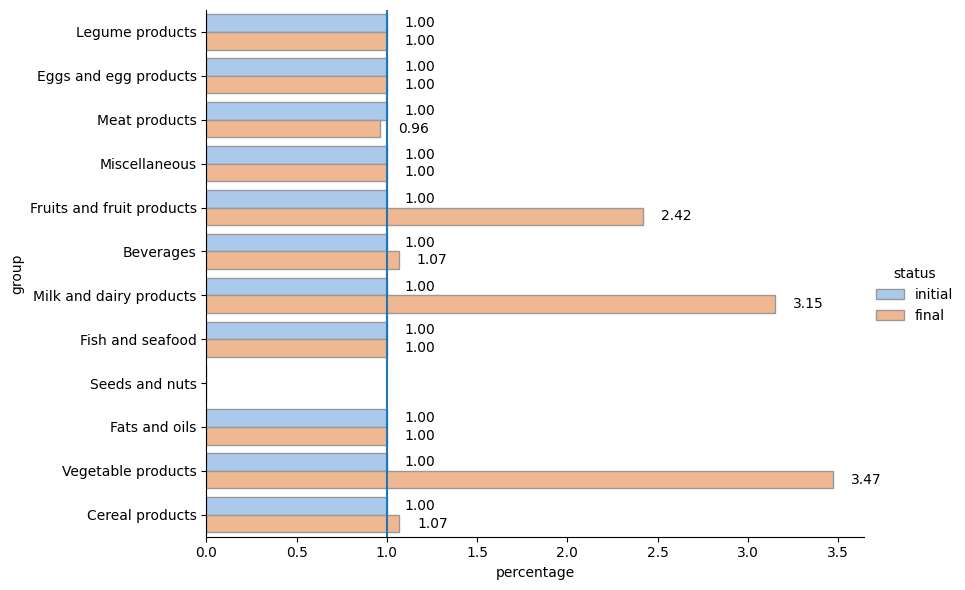

In [ ]:
showGroupBarGraph(female25G)

{'nutrient': ['Legume products', 'Eggs and egg products', 'Meat products', 'Miscellaneous', 'Fruits and fruit products', 'Beverages', 'Milk and dairy products', 'Fish and seafood', 'Seeds and nuts', 'Fats and oils', 'Vegetable products', 'Cereal products', 'Legume products', 'Eggs and egg products', 'Meat products', 'Miscellaneous', 'Fruits and fruit products', 'Beverages', 'Milk and dairy products', 'Fish and seafood', 'Seeds and nuts', 'Fats and oils', 'Vegetable products', 'Cereal products'], 'status': ['initial', 'initial', 'initial', 'initial', 'initial', 'initial', 'initial', 'initial', 'initial', 'initial', 'initial', 'initial', 'final', 'final', 'final', 'final', 'final', 'final', 'final', 'final', 'final', 'final', 'final', 'final'], 'value': [1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.1373626373626373, 0.6896551724137931, 1.0416883793642522, 1.0, 1.6770670826833074, 1.0090515545061, 3.425, 2.0, 0.0, 1.0, 3.935185185185185, 1.073751257123701]}
              

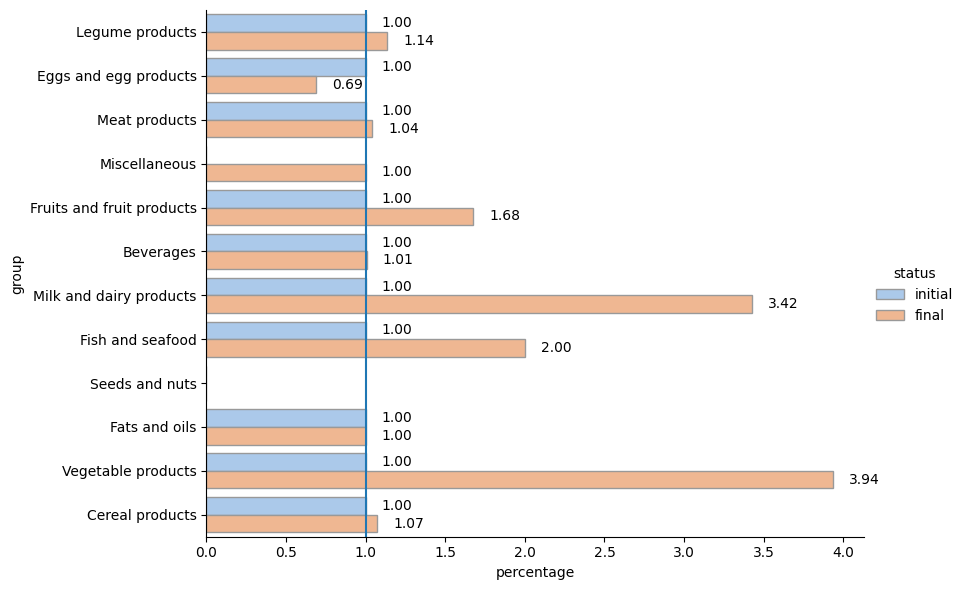

In [ ]:
showGroupBarGraph(female60G)

{'nutrient': ['Legume products', 'Eggs and egg products', 'Meat products', 'Miscellaneous', 'Fruits and fruit products', 'Beverages', 'Milk and dairy products', 'Fish and seafood', 'Seeds and nuts', 'Fats and oils', 'Vegetable products', 'Cereal products', 'Legume products', 'Eggs and egg products', 'Meat products', 'Miscellaneous', 'Fruits and fruit products', 'Beverages', 'Milk and dairy products', 'Fish and seafood', 'Seeds and nuts', 'Fats and oils', 'Vegetable products', 'Cereal products'], 'status': ['initial', 'initial', 'initial', 'initial', 'initial', 'initial', 'initial', 'initial', 'initial', 'initial', 'initial', 'initial', 'final', 'final', 'final', 'final', 'final', 'final', 'final', 'final', 'final', 'final', 'final', 'final'], 'value': [1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0338983050847457, 0.0, 1.0864304235090751, 1.0, 1.5940119760479041, 1.070539419087137, 5.716713881019831, 4.0, 0.0, 1.0, 4.340455840455841, 1.0518806744487679]}
              

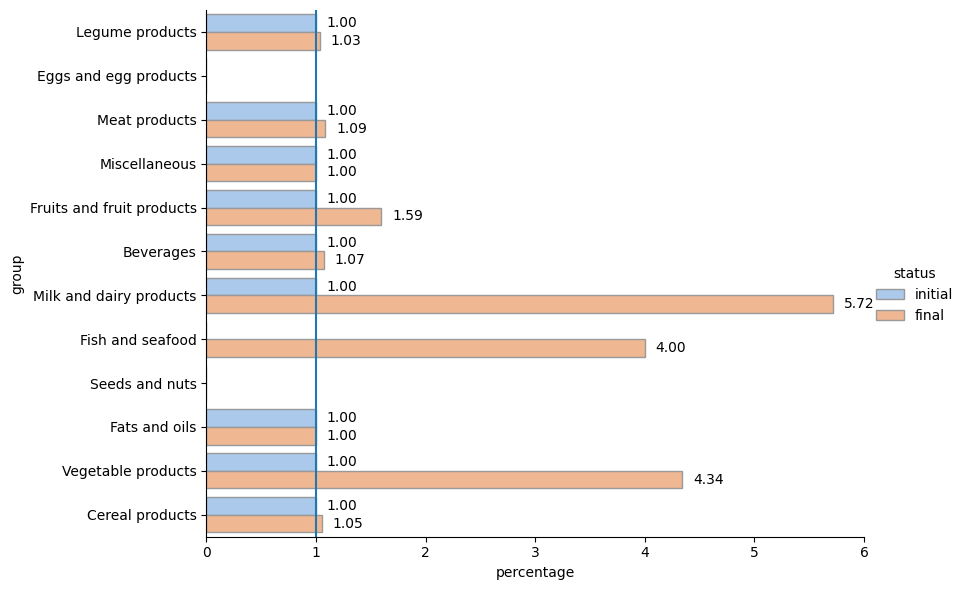

In [ ]:
showGroupBarGraph(male25G)

{'nutrient': ['Legume products', 'Eggs and egg products', 'Meat products', 'Miscellaneous', 'Fruits and fruit products', 'Beverages', 'Milk and dairy products', 'Fish and seafood', 'Seeds and nuts', 'Fats and oils', 'Vegetable products', 'Cereal products', 'Legume products', 'Eggs and egg products', 'Meat products', 'Miscellaneous', 'Fruits and fruit products', 'Beverages', 'Milk and dairy products', 'Fish and seafood', 'Seeds and nuts', 'Fats and oils', 'Vegetable products', 'Cereal products'], 'status': ['initial', 'initial', 'initial', 'initial', 'initial', 'initial', 'initial', 'initial', 'initial', 'initial', 'initial', 'initial', 'final', 'final', 'final', 'final', 'final', 'final', 'final', 'final', 'final', 'final', 'final', 'final'], 'value': [1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.1176470588235294, 1.0, 1.0720164609053497, 0.0, 1.8580441640378549, 1.032850997262417, 3.13986013986014, 1.0, 0.0, 1.0, 3.7410526315789467, 1.1510204081632653]}
              

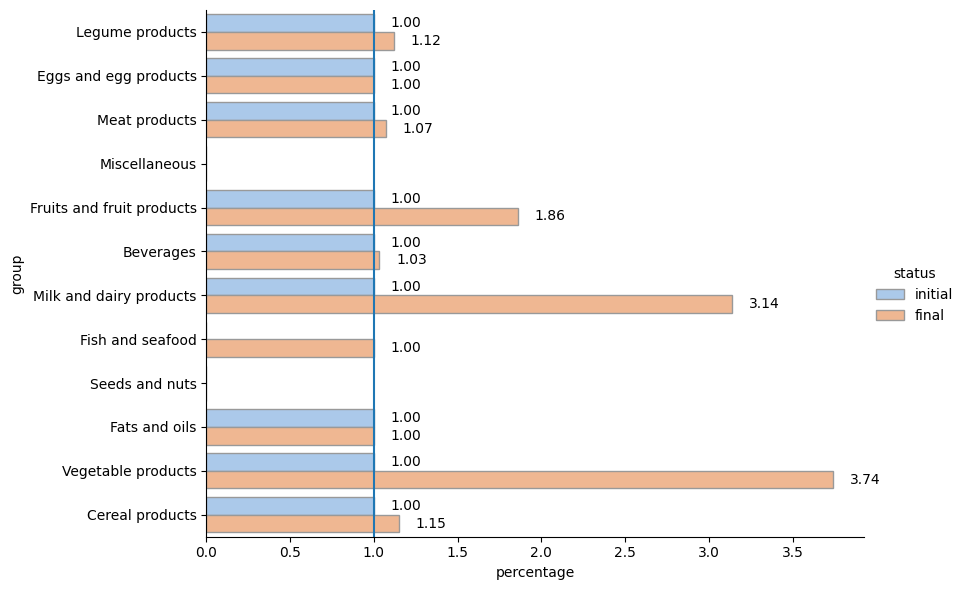

In [ ]:
showGroupBarGraph(male60G)

In [17]:
s1  = 20
s2 = 20

l = list(range(100))
random.shuffle(l)
print("l", l)

l.sort(reverse=False)
l = l[:s1]
random.shuffle(l)
print("l", l)

l.sort(reverse=False)
l = [
            value
            for value in l[
                : min(s2, len(l))
            ]
        ]
print("l", l)


l [9, 53, 35, 98, 99, 57, 28, 2, 33, 84, 61, 0, 10, 72, 7, 1, 78, 73, 88, 92, 3, 32, 70, 30, 71, 49, 83, 37, 16, 52, 55, 43, 29, 44, 65, 91, 66, 90, 75, 18, 80, 77, 58, 95, 74, 15, 85, 96, 31, 89, 64, 45, 62, 40, 8, 63, 47, 76, 79, 36, 38, 34, 54, 97, 94, 56, 50, 17, 93, 46, 27, 87, 20, 39, 22, 68, 48, 67, 24, 42, 26, 5, 21, 86, 51, 25, 4, 82, 60, 11, 13, 41, 23, 12, 6, 19, 59, 69, 81, 14]
l [14, 11, 12, 16, 18, 1, 7, 2, 15, 8, 17, 3, 6, 0, 4, 13, 10, 5, 19, 9]
l [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]
